# Individual Algo Weak Scaling (Thread numbers on same plot)

In [32]:
!pip install llnl-thicket

In [33]:
import sys
# sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
# sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [34]:
from google.colab import drive
drive.mount('/content/drive')

## modify this to whatever directory you saved this file and the data in
%cd /content/drive/My Drive/thicket-practice/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/thicket-practice


Read in all the files

In [35]:
tk = th.Thicket.from_caliperreader(glob("merge_cuda_cali/*.cali"))
tk.dataframe = tk.dataframe.drop(["nid", "spot.channel", "Total time"], axis=1)

In [36]:
# Performance data
tk.dataframe

Min time/rank  \
node                                              profile                     
{'name': 'main', 'type': 'function'}              15660498         0.591064   
                                                  31740176         0.353510   
                                                  49815905         0.360932   
                                                  88861267         0.358142   
                                                  228616304        0.372276   
                                                  251413798        0.639186   
                                                  262997055        0.365059   
                                                  343559275        0.353209   
                                                  387030659        0.340622   
                                                  394569669        0.353000   
                                                  459820732        0.350858   
                                                  475403313        0.361545   
                                                  486084416        0.367759   
                                                  488438234        0.351753   
                                                  516209360        0.359017   
                                                  599137008        0.660256   
                                                  668040824        0.370204   
                                                  741255774        0.351968   
                                                  813158040        0.369802   
                                                  822511981        0.651992   
                                                  846075167        0.390066   
                                                  855855079        0.358922   
                                                  925785954        0.372107   
                                                  932243322        0.362705   
                                                  942198092        0.655318   
                                                  954091769        0.356645   
                                                  959553256        0.375283   
                                                  992866781        0.355276   
                                                  1103112137       0.359590   
                                                  1105235852       0.361336   
                                                  1136263315       0.361038   
                                                  1150597535       0.527234   
                                                  1267159632       0.344253   
                                                  1318850498       0.372393   
                                                  1350955218       0.347853   
                                                  1363858735       0.619596   
                                                  1365468590       0.373506   
                                                  1392484338       0.260603   
                                                  1443108942       0.373497   
                                                  1458497127       0.359253   
                                                  1613206406       0.371388   
                                                  1685341589       0.362639   
                                                  1808352864       0.353797   
                                                  1851200863       0.627364   
                                                  1851416930       0.404598   
                                                  1866006223       0.370443   
                                                  1906432979       0.353198   
                                                  1927156590       0.365575   
                                                  1999958648       0.256301   
                                 

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [37]:
tk.statsframe.dataframe["time"]= 1
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.1

1.000 main
├─ 1.000 comm
│  └─ 1.000 comm_large
├─ 1.000 comp
│  └─ 1.000 comp_large
├─ 1.000 correctness_check
└─ 1.000 data_init



In [38]:
tk.metadata

,cali.caliper.version,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:cuda.gputime,spot:node.order,spot:output,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,num_threads,num_blocks,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,,
15660498,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,16384-128-3-cudamerge.cali,1701464971,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort, 16384, 128, 3]",g,MergeSort,CUDA,int,4,16384,Random,N/A,128,128,14,Online
31740176,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,4096-1024-3-cudamerge.cali,1701466302,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort, 4096, 1024, 3]",g,MergeSort,CUDA,int,4,4096,Random,N/A,1024,4,14,Online
49815905,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,4096-128-1-cudamerge.cali,1701466175,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort, 4096, 128, 1]",g,MergeSort,CUDA,int,4,4096,ReverseSorted,N/A,128,32,14,Online
88861267,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,8192-128-1-cudamerge.cali,1701465078,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort, 8192, 128, 1]",g,MergeSort,CUDA,int,4,8192,ReverseSorted,N/A,128,64,14,Online
228616304,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,4096-128-2-cudamerge.cali,1701466241,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort, 4096, 128, 2]",g,MergeSort,CUDA,int,4,4096,1%perturbed,N/A,128,32,14,Online
251413798,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,16384-512-1-cudamerge.cali,1701464955,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort, 16384, 512, 1]",g,MergeSort,CUDA,int,4,16384,ReverseSorted,N/A,512,32,14,Online
262997055,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,16384-256-2-cudamerge.cali,1701464971,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort, 16384, 256, 2]",g,MergeSort,CUDA,int,4,16384,1%perturbed,N/A,256,64,14,Online
343559275,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,2048-256-2-cudamerge.cali,1701466715,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort, 2048, 256, 2]",g,MergeSort,CUDA,int,4,2048,1%perturbed,N/A,256,8,14,Online
387030659,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,8192-1024-2-cudamerge.cali,1701465114,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort, 8192, 1024, 2]",g,MergeSort,CUDA,int,4,8192,1%perturbed,N/A,1024,8,14,Online


In [39]:
gb = tk.groupby("InputType")
print(gb.keys())
allthickets = list(gb.values())
inputsorted = gb['Sorted'].groupby("num_threads")
inputreversed = gb['ReverseSorted'].groupby("num_threads")
inputrandom = gb['Random'].groupby("num_threads")
inputperturbed = gb['1%perturbed'].groupby("num_threads")

4  thickets created...
{'1%perturbed': <thicket.thicket.Thicket object at 0x7aaa5ae78f40>, 'Random': <thicket.thicket.Thicket object at 0x7aaa5ae7a530>, 'ReverseSorted': <thicket.thicket.Thicket object at 0x7aaa58bb1240>, 'Sorted': <thicket.thicket.Thicket object at 0x7aaa58bb16c0>}
dict_keys(['1%perturbed', 'Random', 'ReverseSorted', 'Sorted'])
5  thickets created...
{64: <thicket.thicket.Thicket object at 0x7aaa58bb33a0>, 128: <thicket.thicket.Thicket object at 0x7aaa58bc03d0>, 256: <thicket.thicket.Thicket object at 0x7aaa58bc22f0>, 512: <thicket.thicket.Thicket object at 0x7aaa58bc38e0>, 1024: <thicket.thicket.Thicket object at 0x7aaa58da5870>}
5  thickets created...
{64: <thicket.thicket.Thicket object at 0x7aaa58da7400>, 128: <thicket.thicket.Thicket object at 0x7aaa58da66b0>, 256: <thicket.thicket.Thicket object at 0x7aaa58d85870>, 512: <thicket.thicket.Thicket object at 0x7aaa58d87280>, 1024: <thicket.thicket.Thicket object at 0x7aaa58d86440>}
5  thickets created...
{64: <thick

Compose these 3 groups column-wise to get a holistic view of the data

In [40]:
ctksorted = th.Thicket.concat_thickets(
    thickets=list(inputsorted.values()),
    headers=list(inputsorted.keys()),
    axis="columns",
    metadata_key="InputSize"
)

ctkreversed = th.Thicket.concat_thickets(
    thickets=list(inputreversed.values()),
    headers=list(inputreversed.keys()),
    axis="columns",
    metadata_key="InputSize"
)

ctkperturbed = th.Thicket.concat_thickets(
    thickets=list(inputperturbed.values()),
    headers=list(inputperturbed.keys()),
    axis="columns",
    metadata_key="InputSize"
)

ctkrandom = th.Thicket.concat_thickets(
    thickets=list(inputrandom.values()),
    headers=list(inputrandom.keys()),
    axis="columns",
    metadata_key="InputSize"
)



allctk = []
allctk.append(ctksorted)
allctk.append(ctkreversed)
allctk.append(ctkperturbed)
allctk.append(ctkrandom)

In [41]:
for ctk in allctk:
    display(ctk.dataframe)

64  \
                                                            Min time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              2048           0.359590   
                                                  4096           0.404598   
                                                  8192           0.243859   
                                                  16384          0.353198   
                                                  32768          0.358516   
{'name': 'comm', 'type': 'function'}              2048           0.000160   
                                                  4096           0.000173   
                                                  8192           0.000167   
                                                  16384          0.000186   
                                                  32768          0.000215   
{'name': 'comm_large', 'type': 'function'}        2048           0.000098   
                                                  4096           0.000094   
                                                  8192           0.000104   
                                                  16384          0.000122   
                                                  32768          0.000151   
{'name': 'comp', 'type': 'function'}              2048           0.000331   
                                                  4096           0.000326   
                                                  8192           0.000355   
                                                  16384          0.000435   
                                                  32768          0.000457   
{'name': 'comp_large', 'type': 'function'}        2048           0.000221   
                                                  4096           0.000207   
                                                  8192           0.000229   
                                                  16384          0.000276   
                                                  32768          0.000288   
{'name': 'correctness_check', 'type': 'function'} 2048           0.000293   
                                                  4096           0.000298   
                                                  8192           0.000260   
                                                  16384          0.000360   
                                                  32768          0.000446   
{'name': 'data_init', 'type': 'function'}         2048           0.000019   
                                                  4096           0.000027   
                                                  8192           0.000035   
                                                  16384          0.000058   
                                                  32768          0.000131   

                                                                           \
                                                            Max time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              2048           0.359590   
                                                  4096           0.404598   
                                                  8192           0.243859   
                                                  16384          0.353198   
                                                  32768          0.358516   
{'name': 'comm', 'type': 'function'}              2048           0.000160   
                                                  4096           0.000173   
                                                  8192           0.000167   
                                                  16384          0.000186   
                                                  32768          0.000215   
{'name': 'comm_large', 'type': 'function'}        2048           0.000098   
                                                  4096           0

64  \
                                                            Min time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              2048           0.365575   
                                                  4096           0.361140   
                                                  8192           0.361142   
                                                  16384          0.361369   
                                                  32768          0.364320   
{'name': 'comm', 'type': 'function'}              2048           0.000155   
                                                  4096           0.000160   
                                                  8192           0.000161   
                                                  16384          0.000195   
                                                  32768          0.000228   
{'name': 'comm_large', 'type': 'function'}        2048           0.000088   
                                                  4096           0.000090   
                                                  8192           0.000100   
                                                  16384          0.000117   
                                                  32768          0.000161   
{'name': 'comp', 'type': 'function'}              2048           0.000317   
                                                  4096           0.000320   
                                                  8192           0.000348   
                                                  16384          0.000377   
                                                  32768          0.000411   
{'name': 'comp_large', 'type': 'function'}        2048           0.000209   
                                                  4096           0.000202   
                                                  8192           0.000212   
                                                  16384          0.000242   
                                                  32768          0.000263   
{'name': 'correctness_check', 'type': 'function'} 2048           0.000307   
                                                  4096           0.000314   
                                                  8192           0.000371   
                                                  16384          0.000429   
                                                  32768          0.000321   
{'name': 'data_init', 'type': 'function'}         2048           0.000023   
                                                  4096           0.000029   
                                                  8192           0.000042   
                                                  16384          0.000083   
                                                  32768          0.000201   

                                                                           \
                                                            Max time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              2048           0.365575   
                                                  4096           0.361140   
                                                  8192           0.361142   
                                                  16384          0.361369   
                                                  32768          0.364320   
{'name': 'comm', 'type': 'function'}              2048           0.000155   
                                                  4096           0.000160   
                                                  8192           0.000161   
                                                  16384          0.000195   
                                                  32768          0.000228   
{'name': 'comm_large', 'type': 'function'}        2048           0.000088   
                                                  4096           0

64  \
                                                            Min time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              2048           0.359440   
                                                  4096           0.358508   
                                                  8192           0.342552   
                                                  16384          0.370204   
                                                  32768          0.655318   
{'name': 'comm', 'type': 'function'}              2048           0.000151   
                                                  4096           0.000151   
                                                  8192           0.000168   
                                                  16384          0.000176   
                                                  32768          0.000208   
{'name': 'comm_large', 'type': 'function'}        2048           0.000083   
                                                  4096           0.000084   
                                                  8192           0.000099   
                                                  16384          0.000114   
                                                  32768          0.000143   
{'name': 'comp', 'type': 'function'}              2048           0.000298   
                                                  4096           0.000319   
                                                  8192           0.000342   
                                                  16384          0.000360   
                                                  32768          0.000382   
{'name': 'comp_large', 'type': 'function'}        2048           0.000190   
                                                  4096           0.000195   
                                                  8192           0.000215   
                                                  16384          0.000223   
                                                  32768          0.000236   
{'name': 'correctness_check', 'type': 'function'} 2048           0.000363   
                                                  4096           0.000297   
                                                  8192           0.000323   
                                                  16384          0.000355   
                                                  32768          0.000395   
{'name': 'data_init', 'type': 'function'}         2048           0.000063   
                                                  4096           0.000109   
                                                  8192           0.000214   
                                                  16384          0.000394   
                                                  32768          0.000976   

                                                                           \
                                                            Max time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              2048           0.359440   
                                                  4096           0.358508   
                                                  8192           0.342552   
                                                  16384          0.370204   
                                                  32768          0.655318   
{'name': 'comm', 'type': 'function'}              2048           0.000151   
                                                  4096           0.000151   
                                                  8192           0.000168   
                                                  16384          0.000176   
                                                  32768          0.000208   
{'name': 'comm_large', 'type': 'function'}        2048           0.000083   
                                                  4096           0

64  \
                                                            Min time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              2048           0.351753   
                                                  4096           0.527234   
                                                  8192           0.353797   
                                                  16384          0.643899   
                                                  32768          0.260603   
{'name': 'comm', 'type': 'function'}              2048           0.000143   
                                                  4096           0.000153   
                                                  8192           0.000163   
                                                  16384          0.000181   
                                                  32768          0.000217   
{'name': 'comm_large', 'type': 'function'}        2048           0.000084   
                                                  4096           0.000092   
                                                  8192           0.000095   
                                                  16384          0.000118   
                                                  32768          0.000154   
{'name': 'comp', 'type': 'function'}              2048           0.000308   
                                                  4096           0.000315   
                                                  8192           0.000335   
                                                  16384          0.000367   
                                                  32768          0.000416   
{'name': 'comp_large', 'type': 'function'}        2048           0.000199   
                                                  4096           0.000198   
                                                  8192           0.000209   
                                                  16384          0.000223   
                                                  32768          0.000262   
{'name': 'correctness_check', 'type': 'function'} 2048           0.000352   
                                                  4096           0.000232   
                                                  8192           0.000332   
                                                  16384          0.000327   
                                                  32768          0.000344   
{'name': 'data_init', 'type': 'function'}         2048           0.000066   
                                                  4096           0.000106   
                                                  8192           0.000182   
                                                  16384          0.000354   
                                                  32768          0.000727   

                                                                           \
                                                            Max time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              2048           0.351753   
                                                  4096           0.527234   
                                                  8192           0.353797   
                                                  16384          0.643899   
                                                  32768          0.260603   
{'name': 'comm', 'type': 'function'}              2048           0.000143   
                                                  4096           0.000153   
                                                  8192           0.000163   
                                                  16384          0.000181   
                                                  32768          0.000217   
{'name': 'comm_large', 'type': 'function'}        2048           0.000084   
                                                  4096           0

Perform pandas operations to get the table in a desirable format for plotting

In [42]:
for ctk in allctk:
    # Drop unwanted columns
    columns_to_drop = [("node", ""), ("index", ""),]
    ctk.dataframe = ctk.dataframe.reset_index().drop(columns_to_drop, axis=1, errors='ignore')
    # Rename index to remove tuple
    ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("InputSize", ""): "InputSize"}).set_index(["name", "InputSize"])

In [43]:
for ctk in allctk:
    display(ctk.dataframe)

64                              \
                            Min time/rank Max time/rank Avg time/rank   
name              InputSize                                             
main              2048           0.359590      0.359590      0.359590   
                  4096           0.404598      0.404598      0.404598   
                  8192           0.243859      0.243859      0.243859   
                  16384          0.353198      0.353198      0.353198   
                  32768          0.358516      0.358516      0.358516   
comm              2048           0.000160      0.000160      0.000160   
                  4096           0.000173      0.000173      0.000173   
                  8192           0.000167      0.000167      0.000167   
                  16384          0.000186      0.000186      0.000186   
                  32768          0.000215      0.000215      0.000215   
comm_large        2048           0.000098      0.000098      0.000098   
                  4096           0.000094      0.000094      0.000094   
                  8192           0.000104      0.000104      0.000104   
                  16384          0.000122      0.000122      0.000122   
                  32768          0.000151      0.000151      0.000151   
comp              2048           0.000331      0.000331      0.000331   
                  4096           0.000326      0.000326      0.000326   
                  8192           0.000355      0.000355      0.000355   
                  16384          0.000435      0.000435      0.000435   
                  32768          0.000457      0.000457      0.000457   
comp_large        2048           0.000221      0.000221      0.000221   
                  4096           0.000207      0.000207      0.000207   
                  8192           0.000229      0.000229      0.000229   
                  16384          0.000276      0.000276      0.000276   
                  32768          0.000288      0.000288      0.000288   
correctness_check 2048           0.000293      0.000293      0.000293   
                  4096           0.000298      0.000298      0.000298   
                  8192           0.000260      0.000260      0.000260   
                  16384          0.000360      0.000360      0.000360   
                  32768          0.000446      0.000446      0.000446   
data_init         2048           0.000019      0.000019      0.000019   
                  4096           0.000027      0.000027      0.000027   
                  8192           0.000035      0.000035      0.000035   
                  16384          0.000058      0.000058      0.000058   
                  32768          0.000131      0.000131      0.000131   

                                                                 \
                            Avg GPU time/rank Min GPU time/rank   
name              InputSize                                       
main              2048               0.000723          0.000723   
                  4096               0.001611          0.001611   
                  8192               0.001717          0.001717   
                  16384              0.004649          0.004649   
                  32768              0.010088          0.010088   
comm              2048               0.000006          0.000006   
                  4096               0.000009          0.000009   
                  8192               0.000008          0.000008   
                  16384              0.000015          0.000015   
                  32768              0.000027          0.000027   
comm_large        2048               0.000006          0.000006   
                  4096               0.000009          0.000009   
                  8192               0.000008          0.000008   
                  16384              0.000015          0.000015   
                  32768              0.000027          0.000027   
comp              2048               0.000717          0.0

64                              \
                            Min time/rank Max time/rank Avg time/rank   
name              InputSize                                             
main              2048           0.365575      0.365575      0.365575   
                  4096           0.361140      0.361140      0.361140   
                  8192           0.361142      0.361142      0.361142   
                  16384          0.361369      0.361369      0.361369   
                  32768          0.364320      0.364320      0.364320   
comm              2048           0.000155      0.000155      0.000155   
                  4096           0.000160      0.000160      0.000160   
                  8192           0.000161      0.000161      0.000161   
                  16384          0.000195      0.000195      0.000195   
                  32768          0.000228      0.000228      0.000228   
comm_large        2048           0.000088      0.000088      0.000088   
                  4096           0.000090      0.000090      0.000090   
                  8192           0.000100      0.000100      0.000100   
                  16384          0.000117      0.000117      0.000117   
                  32768          0.000161      0.000161      0.000161   
comp              2048           0.000317      0.000317      0.000317   
                  4096           0.000320      0.000320      0.000320   
                  8192           0.000348      0.000348      0.000348   
                  16384          0.000377      0.000377      0.000377   
                  32768          0.000411      0.000411      0.000411   
comp_large        2048           0.000209      0.000209      0.000209   
                  4096           0.000202      0.000202      0.000202   
                  8192           0.000212      0.000212      0.000212   
                  16384          0.000242      0.000242      0.000242   
                  32768          0.000263      0.000263      0.000263   
correctness_check 2048           0.000307      0.000307      0.000307   
                  4096           0.000314      0.000314      0.000314   
                  8192           0.000371      0.000371      0.000371   
                  16384          0.000429      0.000429      0.000429   
                  32768          0.000321      0.000321      0.000321   
data_init         2048           0.000023      0.000023      0.000023   
                  4096           0.000029      0.000029      0.000029   
                  8192           0.000042      0.000042      0.000042   
                  16384          0.000083      0.000083      0.000083   
                  32768          0.000201      0.000201      0.000201   

                                                                 \
                            Avg GPU time/rank Min GPU time/rank   
name              InputSize                                       
main              2048               0.000674          0.000674   
                  4096               0.001317          0.001317   
                  8192               0.003293          0.003293   
                  16384              0.004917          0.004917   
                  32768              0.010090          0.010090   
comm              2048               0.000006          0.000006   
                  4096               0.000007          0.000007   
                  8192               0.000012          0.000012   
                  16384              0.000015          0.000015   
                  32768              0.000027          0.000027   
comm_large        2048               0.000006          0.000006   
                  4096               0.000007          0.000007   
                  8192               0.000012          0.000012   
                  16384              0.000015          0.000015   
                  32768              0.000027          0.000027   
comp              2048               0.000669          0.0

64                              \
                            Min time/rank Max time/rank Avg time/rank   
name              InputSize                                             
main              2048           0.359440      0.359440      0.359440   
                  4096           0.358508      0.358508      0.358508   
                  8192           0.342552      0.342552      0.342552   
                  16384          0.370204      0.370204      0.370204   
                  32768          0.655318      0.655318      0.655318   
comm              2048           0.000151      0.000151      0.000151   
                  4096           0.000151      0.000151      0.000151   
                  8192           0.000168      0.000168      0.000168   
                  16384          0.000176      0.000176      0.000176   
                  32768          0.000208      0.000208      0.000208   
comm_large        2048           0.000083      0.000083      0.000083   
                  4096           0.000084      0.000084      0.000084   
                  8192           0.000099      0.000099      0.000099   
                  16384          0.000114      0.000114      0.000114   
                  32768          0.000143      0.000143      0.000143   
comp              2048           0.000298      0.000298      0.000298   
                  4096           0.000319      0.000319      0.000319   
                  8192           0.000342      0.000342      0.000342   
                  16384          0.000360      0.000360      0.000360   
                  32768          0.000382      0.000382      0.000382   
comp_large        2048           0.000190      0.000190      0.000190   
                  4096           0.000195      0.000195      0.000195   
                  8192           0.000215      0.000215      0.000215   
                  16384          0.000223      0.000223      0.000223   
                  32768          0.000236      0.000236      0.000236   
correctness_check 2048           0.000363      0.000363      0.000363   
                  4096           0.000297      0.000297      0.000297   
                  8192           0.000323      0.000323      0.000323   
                  16384          0.000355      0.000355      0.000355   
                  32768          0.000395      0.000395      0.000395   
data_init         2048           0.000063      0.000063      0.000063   
                  4096           0.000109      0.000109      0.000109   
                  8192           0.000214      0.000214      0.000214   
                  16384          0.000394      0.000394      0.000394   
                  32768          0.000976      0.000976      0.000976   

                                                                 \
                            Avg GPU time/rank Min GPU time/rank   
name              InputSize                                       
main              2048               0.000790          0.000790   
                  4096               0.001588          0.001588   
                  8192               0.003266          0.003266   
                  16384              0.007118          0.007118   
                  32768              0.016823          0.016823   
comm              2048               0.000005          0.000005   
                  4096               0.000007          0.000007   
                  8192               0.000010          0.000010   
                  16384              0.000016          0.000016   
                  32768              0.000028          0.000028   
comm_large        2048               0.000005          0.000005   
                  4096               0.000007          0.000007   
                  8192               0.000010          0.000010   
                  16384              0.000016          0.000016   
                  32768              0.000028          0.000028   
comp              2048               0.000785          0.0

64                              \
                            Min time/rank Max time/rank Avg time/rank   
name              InputSize                                             
main              2048           0.351753      0.351753      0.351753   
                  4096           0.527234      0.527234      0.527234   
                  8192           0.353797      0.353797      0.353797   
                  16384          0.643899      0.643899      0.643899   
                  32768          0.260603      0.260603      0.260603   
comm              2048           0.000143      0.000143      0.000143   
                  4096           0.000153      0.000153      0.000153   
                  8192           0.000163      0.000163      0.000163   
                  16384          0.000181      0.000181      0.000181   
                  32768          0.000217      0.000217      0.000217   
comm_large        2048           0.000084      0.000084      0.000084   
                  4096           0.000092      0.000092      0.000092   
                  8192           0.000095      0.000095      0.000095   
                  16384          0.000118      0.000118      0.000118   
                  32768          0.000154      0.000154      0.000154   
comp              2048           0.000308      0.000308      0.000308   
                  4096           0.000315      0.000315      0.000315   
                  8192           0.000335      0.000335      0.000335   
                  16384          0.000367      0.000367      0.000367   
                  32768          0.000416      0.000416      0.000416   
comp_large        2048           0.000199      0.000199      0.000199   
                  4096           0.000198      0.000198      0.000198   
                  8192           0.000209      0.000209      0.000209   
                  16384          0.000223      0.000223      0.000223   
                  32768          0.000262      0.000262      0.000262   
correctness_check 2048           0.000352      0.000352      0.000352   
                  4096           0.000232      0.000232      0.000232   
                  8192           0.000332      0.000332      0.000332   
                  16384          0.000327      0.000327      0.000327   
                  32768          0.000344      0.000344      0.000344   
data_init         2048           0.000066      0.000066      0.000066   
                  4096           0.000106      0.000106      0.000106   
                  8192           0.000182      0.000182      0.000182   
                  16384          0.000354      0.000354      0.000354   
                  32768          0.000727      0.000727      0.000727   

                                                                 \
                            Avg GPU time/rank Min GPU time/rank   
name              InputSize                                       
main              2048               0.000950          0.000950   
                  4096               0.002276          0.002276   
                  8192               0.003810          0.003810   
                  16384              0.009026          0.009026   
                  32768              0.009807          0.009807   
comm              2048               0.000006          0.000006   
                  4096               0.000009          0.000009   
                  8192               0.000011          0.000011   
                  16384              0.000017          0.000017   
                  32768              0.000026          0.000026   
comm_large        2048               0.000006          0.000006   
                  4096               0.000009          0.000009   
                  8192               0.000011          0.000011   
                  16384              0.000017          0.000017   
                  32768              0.000026          0.000026   
comp              2048               0.000945          0.0

In [44]:
# Define common variables
sizes = sorted(list(set(allctk[0].dataframe.index.get_level_values("InputSize"))))
sizes = [2048, 4096, 8192, 16384, 32768]

In [65]:
# Drop unwanted columns
for ctk in allctk:
    columns_to_drop = [
            (  64,      'Min GPU time/rank'),
            (  64,      'Max GPU time/rank'),
            (  64, 'Variance time/rank'),
            (  64, 'Avg time/rank'),
            (  64, 'Total GPU time'),
            ( 128,      'Min GPU time/rank'),
            ( 128,      'Max GPU time/rank'),
            ( 128, 'Variance time/rank'),
            (  128, 'Avg time/rank'),
            (  128, 'Total GPU time'),
            ( 256,      'Min GPU time/rank'),
            ( 256,      'Max GPU time/rank'),
            ( 256, 'Variance time/rank'),
            (  256, 'Avg time/rank'),
            (  256, 'Total GPU time'),
            ( 512,      'Min GPU time/rank'),
            ( 512,      'Max GPU time/rank'),
            ( 512, 'Variance time/rank'),
            (  512, 'Avg time/rank'),
            (  512, 'Total GPU time'),
            (1024,      'Min GPU time/rank'),
            (1024,      'Max GPU time/rank'),
            (1024, 'Variance time/rank'),
            (  1024, 'Avg time/rank'),
            (  1024, 'Total GPU time'),]

    ctk.dataframe = ctk.dataframe.drop(columns_to_drop, axis=1, errors='ignore')
    function_names = sorted(ctk.dataframe.columns.tolist())
print(ctk.dataframe.columns)
print(function_names)


MultiIndex([(  64, 'Avg GPU time/rank'),
            ( 128, 'Avg GPU time/rank'),
            ( 256, 'Avg GPU time/rank'),
            ( 512, 'Avg GPU time/rank'),
            (1024, 'Avg GPU time/rank')],
           )
[(64, 'Avg GPU time/rank'), (128, 'Avg GPU time/rank'), (256, 'Avg GPU time/rank'), (512, 'Avg GPU time/rank'), (1024, 'Avg GPU time/rank')]


In [66]:
for ctk in allctk:
    display(ctk.metadata)

64    \
          cali.caliper.version   
InputSize                        
2048                2.11.0-dev   
4096                2.11.0-dev   
8192                2.11.0-dev   
16384               2.11.0-dev   
32768               2.11.0-dev   

                                                              \
                                                spot.metrics   
InputSize                                                      
2048       min#inclusive#sum#time.duration,max#inclusive#...   
4096       min#inclusive#sum#time.duration,max#inclusive#...   
8192       min#inclusive#sum#time.duration,max#inclusive#...   
16384      min#inclusive#sum#time.duration,max#inclusive#...   
32768      min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
2048                                                2   
4096                                                2   
8192                                                2   
16384                                               2   
32768                                               2   

                                                                \
                      spot.options  spot.channels cali.channel   
InputSize                                                        
2048       cuda.gputime,node.order  regionprofile         spot   
4096       cuda.gputime,node.order  regionprofile         spot   
8192       cuda.gputime,node.order  regionprofile         spot   
16384      cuda.gputime,node.order  regionprofile         spot   
32768      cuda.gputime,node.order  regionprofile         spot   

                                                                        \
          spot:cuda.gputime spot:node.order                spot:output   
InputSize                                                                
2048                   true            true   2048-64-0-cudamerge.cali   
4096                   true            true   4096-64-0-cudamerge.cali   
8192                   true            true   8192-64-0-cudamerge.cali   
16384                  true            true  16384-64-0-cudamerge.cali   
32768                  true            true  32768-64-0-cudamerge.cali   

                                                                          \
           launchdate                                          libraries   
InputSize                                                                  
2048       1701466535  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4096       1701466076  [/scratch/group/csce435-f23/Caliper/caliper/li...   
8192       1701465058  [/scratch/group/csce435-f23/Caliper/caliper/li...   
16384      1701464940  [/scratch/group/csce435-f23/Caliper/caliper/li...   
32768      1701464733  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                            \
                               cmdline cluster  Algorithm ProgrammingModel   
InputSize                                                                    
2048        [./mergesort, 2048, 64, 0]       g  MergeSort             CUDA   
4096        [./mergesort, 4096, 64, 0]       g  MergeSort             CUDA   
8192        [./mergesort, 8192, 64, 0]       g  MergeSort             CUDA   
16384      [./mergesort, 16384, 64, 0]       g  MergeSort             CUDA   
32768      [./mergesort, 32768, 64, 0]       g  MergeSort             CUDA   

                                                                              \
          Datatype SizeOfDatatype InputType num_procs num_threads num_blocks   
InputSize                                                                      
2048           int              4    Sorted       N/A          64         32   
4096           int              4    Sorted       N/A          64         64   
8192           int         

64    \
          cali.caliper.version   
InputSize                        
2048                2.11.0-dev   
4096                2.11.0-dev   
8192                2.11.0-dev   
16384               2.11.0-dev   
32768               2.11.0-dev   

                                                              \
                                                spot.metrics   
InputSize                                                      
2048       min#inclusive#sum#time.duration,max#inclusive#...   
4096       min#inclusive#sum#time.duration,max#inclusive#...   
8192       min#inclusive#sum#time.duration,max#inclusive#...   
16384      min#inclusive#sum#time.duration,max#inclusive#...   
32768      min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
2048                                                2   
4096                                                2   
8192                                                2   
16384                                               2   
32768                                               2   

                                                                \
                      spot.options  spot.channels cali.channel   
InputSize                                                        
2048       cuda.gputime,node.order  regionprofile         spot   
4096       cuda.gputime,node.order  regionprofile         spot   
8192       cuda.gputime,node.order  regionprofile         spot   
16384      cuda.gputime,node.order  regionprofile         spot   
32768      cuda.gputime,node.order  regionprofile         spot   

                                                                        \
          spot:cuda.gputime spot:node.order                spot:output   
InputSize                                                                
2048                   true            true   2048-64-1-cudamerge.cali   
4096                   true            true   4096-64-1-cudamerge.cali   
8192                   true            true   8192-64-1-cudamerge.cali   
16384                  true            true  16384-64-1-cudamerge.cali   
32768                  true            true  32768-64-1-cudamerge.cali   

                                                                          \
           launchdate                                          libraries   
InputSize                                                                  
2048       1701466603  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4096       1701466151  [/scratch/group/csce435-f23/Caliper/caliper/li...   
8192       1701465079  [/scratch/group/csce435-f23/Caliper/caliper/li...   
16384      1701464955  [/scratch/group/csce435-f23/Caliper/caliper/li...   
32768      1701464756  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                            \
                               cmdline cluster  Algorithm ProgrammingModel   
InputSize                                                                    
2048        [./mergesort, 2048, 64, 1]       g  MergeSort             CUDA   
4096        [./mergesort, 4096, 64, 1]       g  MergeSort             CUDA   
8192        [./mergesort, 8192, 64, 1]       g  MergeSort             CUDA   
16384      [./mergesort, 16384, 64, 1]       g  MergeSort             CUDA   
32768      [./mergesort, 32768, 64, 1]       g  MergeSort             CUDA   

                                                                        \
          Datatype SizeOfDatatype      InputType num_procs num_threads   
InputSize                                                                
2048           int              4  ReverseSorted       N/A          64   
4096           int              4  ReverseSorted       N/A          64   
8192           int              4  ReverseSorted       N/

64    \
          cali.caliper.version   
InputSize                        
2048                2.11.0-dev   
4096                2.11.0-dev   
8192                2.11.0-dev   
16384               2.11.0-dev   
32768               2.11.0-dev   

                                                              \
                                                spot.metrics   
InputSize                                                      
2048       min#inclusive#sum#time.duration,max#inclusive#...   
4096       min#inclusive#sum#time.duration,max#inclusive#...   
8192       min#inclusive#sum#time.duration,max#inclusive#...   
16384      min#inclusive#sum#time.duration,max#inclusive#...   
32768      min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
2048                                                2   
4096                                                2   
8192                                                2   
16384                                               2   
32768                                               2   

                                                                \
                      spot.options  spot.channels cali.channel   
InputSize                                                        
2048       cuda.gputime,node.order  regionprofile         spot   
4096       cuda.gputime,node.order  regionprofile         spot   
8192       cuda.gputime,node.order  regionprofile         spot   
16384      cuda.gputime,node.order  regionprofile         spot   
32768      cuda.gputime,node.order  regionprofile         spot   

                                                                        \
          spot:cuda.gputime spot:node.order                spot:output   
InputSize                                                                
2048                   true            true   2048-64-2-cudamerge.cali   
4096                   true            true   4096-64-2-cudamerge.cali   
8192                   true            true   8192-64-2-cudamerge.cali   
16384                  true            true  16384-64-2-cudamerge.cali   
32768                  true            true  32768-64-2-cudamerge.cali   

                                                                          \
           launchdate                                          libraries   
InputSize                                                                  
2048       1701466674  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4096       1701466234  [/scratch/group/csce435-f23/Caliper/caliper/li...   
8192       1701465093  [/scratch/group/csce435-f23/Caliper/caliper/li...   
16384      1701464971  [/scratch/group/csce435-f23/Caliper/caliper/li...   
32768      1701464756  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                            \
                               cmdline cluster  Algorithm ProgrammingModel   
InputSize                                                                    
2048        [./mergesort, 2048, 64, 2]       g  MergeSort             CUDA   
4096        [./mergesort, 4096, 64, 2]       g  MergeSort             CUDA   
8192        [./mergesort, 8192, 64, 2]       g  MergeSort             CUDA   
16384      [./mergesort, 16384, 64, 2]       g  MergeSort             CUDA   
32768      [./mergesort, 32768, 64, 2]       g  MergeSort             CUDA   

                                                                      \
          Datatype SizeOfDatatype    InputType num_procs num_threads   
InputSize                                                              
2048           int              4  1%perturbed       N/A          64   
4096           int              4  1%perturbed       N/A          64   
8192           int              4  1%perturbed       N/A          6

64    \
          cali.caliper.version   
InputSize                        
2048                2.11.0-dev   
4096                2.11.0-dev   
8192                2.11.0-dev   
16384               2.11.0-dev   
32768               2.11.0-dev   

                                                              \
                                                spot.metrics   
InputSize                                                      
2048       min#inclusive#sum#time.duration,max#inclusive#...   
4096       min#inclusive#sum#time.duration,max#inclusive#...   
8192       min#inclusive#sum#time.duration,max#inclusive#...   
16384      min#inclusive#sum#time.duration,max#inclusive#...   
32768      min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
2048                                                2   
4096                                                2   
8192                                                2   
16384                                               2   
32768                                               2   

                                                                \
                      spot.options  spot.channels cali.channel   
InputSize                                                        
2048       cuda.gputime,node.order  regionprofile         spot   
4096       cuda.gputime,node.order  regionprofile         spot   
8192       cuda.gputime,node.order  regionprofile         spot   
16384      cuda.gputime,node.order  regionprofile         spot   
32768      cuda.gputime,node.order  regionprofile         spot   

                                                                        \
          spot:cuda.gputime spot:node.order                spot:output   
InputSize                                                                
2048                   true            true   2048-64-3-cudamerge.cali   
4096                   true            true   4096-64-3-cudamerge.cali   
8192                   true            true   8192-64-3-cudamerge.cali   
16384                  true            true  16384-64-3-cudamerge.cali   
32768                  true            true  32768-64-3-cudamerge.cali   

                                                                          \
           launchdate                                          libraries   
InputSize                                                                  
2048       1701466753  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4096       1701466274  [/scratch/group/csce435-f23/Caliper/caliper/li...   
8192       1701465114  [/scratch/group/csce435-f23/Caliper/caliper/li...   
16384      1701464971  [/scratch/group/csce435-f23/Caliper/caliper/li...   
32768      1701464756  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                            \
                               cmdline cluster  Algorithm ProgrammingModel   
InputSize                                                                    
2048        [./mergesort, 2048, 64, 3]       g  MergeSort             CUDA   
4096        [./mergesort, 4096, 64, 3]       g  MergeSort             CUDA   
8192        [./mergesort, 8192, 64, 3]       g  MergeSort             CUDA   
16384      [./mergesort, 16384, 64, 3]       g  MergeSort             CUDA   
32768      [./mergesort, 32768, 64, 3]       g  MergeSort             CUDA   

                                                                              \
          Datatype SizeOfDatatype InputType num_procs num_threads num_blocks   
InputSize                                                                      
2048           int              4    Random       N/A          64         32   
4096           int              4    Random       N/A          64         64   
8192           int         

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [47]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(df.columns)
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [48]:
def plot_mpl3(df,df1, df2, title, xlabel, ylabel, label1, label2, label3):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot(df2, marker='<', label=label3)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [49]:
def plot_mpl2(df,df1, title, xlabel, ylabel, label1, label2):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [50]:
def plot_mpl_inputsizes(df,df1, df2, df3, df4, df5, df6, title, xlabel, ylabel, label1, label2, label3, label4, label5, label6, label7):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot(df2, marker='^', label=label3)
    ax.plot(df3, marker='o', label=label4)
    ax.plot(df4, marker='v', label=label5)
    ax.plot(df5, marker='1', label=label6)
    ax.plot(df6, marker='2', label=label7)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [51]:
def plot_mpl_inputtypes(df,df1, df2, df3, title, xlabel, ylabel, label1, label2, label3, label4):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot(df2, marker='<', label=label3)
    ax.plot(df3, marker='v', label=label4)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(sizes)
    plt.show()
    return fig, ax

In [52]:
def plot_mpl_numprocs(df,df1, df2, df3, df4, title, xlabel, ylabel, label1, label2, label3, label4, label5):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot(df2, marker='^', label=label3)
    ax.plot(df3, marker='o', label=label4)
    ax.plot(df4, marker='v', label=label5)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(sizes)
    plt.show()
    return fig, ax

# Examples

## time

In [73]:
threads = [64, 128, 256, 512, 1024]
sorttypes = [('1 perturbed', 'Avg GPU time/rank'),
            (     'random', 'Avg GPU time/rank'),
            (   'reversed', 'Avg GPU time/rank'),
            (     'sorted', 'Avg GPU time/rank')]
# need to change sizes to be sizes then create an mpl function to take in a df_ of every size
print(ctk.dataframe.columns)

MultiIndex([(  64, 'Avg GPU time/rank'),
            ( 128, 'Avg GPU time/rank'),
            ( 256, 'Avg GPU time/rank'),
            ( 512, 'Avg GPU time/rank'),
            (1024, 'Avg GPU time/rank')],
           )


In [74]:
regions = sorted(list(set(ctk.dataframe.index.get_level_values("name"))))
print(regions)

for ctk in allctk:
    print(ctk.dataframe)

['comm', 'comm_large', 'comp', 'comp_large', 'correctness_check', 'data_init', 'main']
                                           64               128  \
                            Avg GPU time/rank Avg GPU time/rank   
name              InputSize                                       
main              2048               0.000723          0.000690   
                  4096               0.001611          0.001351   
                  8192               0.001717          0.002490   
                  16384              0.004649          0.005173   
                  32768              0.010088          0.009162   
comm              2048               0.000006          0.000006   
                  4096               0.000009          0.000007   
                  8192               0.000008          0.000010   
                  16384              0.000015          0.000015   
                  32768              0.000027          0.000026   
comm_large        2048               0.000

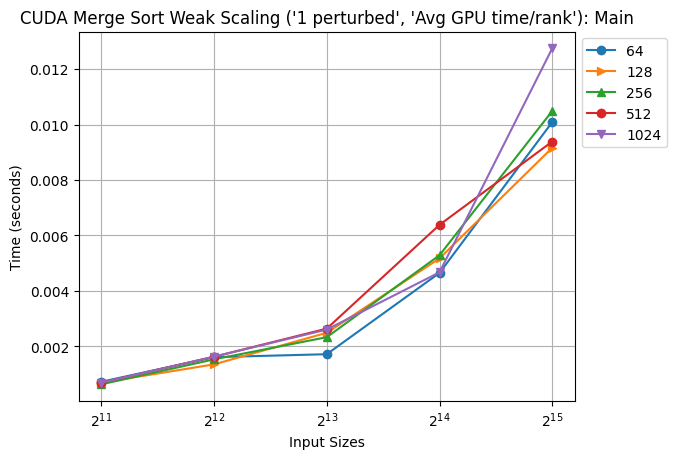

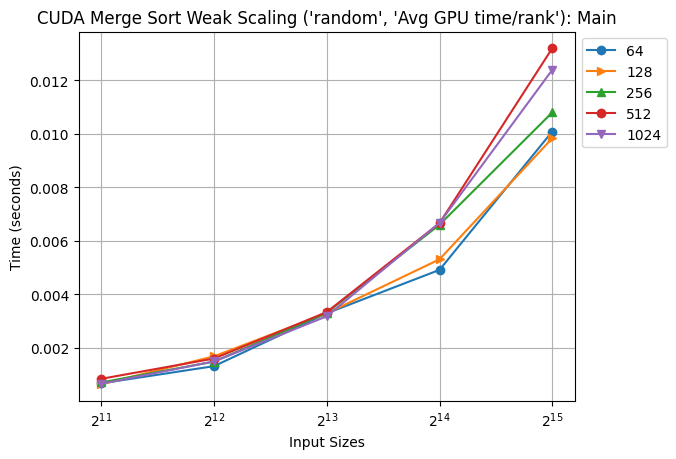

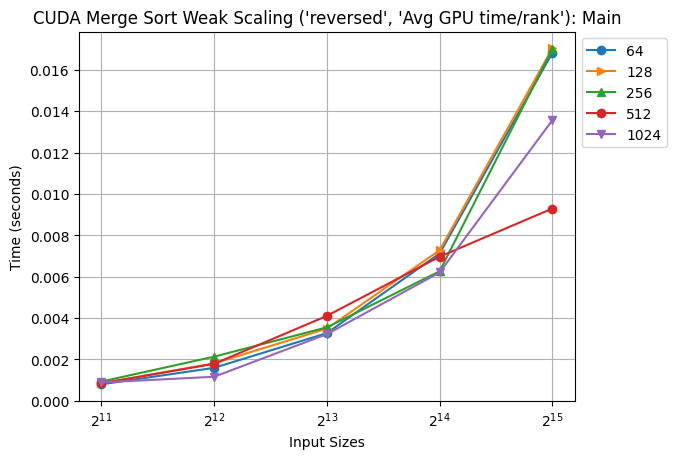

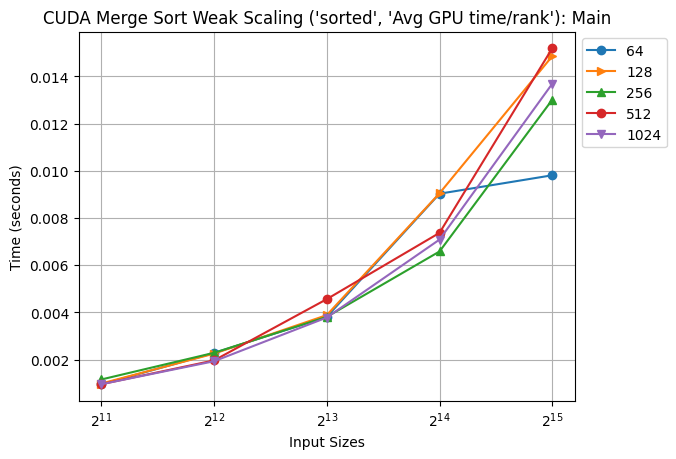

In [75]:
i = 0
for ctk in allctk:
    plot_mpl_numprocs(
        df=ctk.dataframe[[threads[0]]].loc["main"],
        df1= ctk.dataframe[[threads[1]]].loc["main"],
        df2= ctk.dataframe[[threads[2]]].loc["main"],
        df3= ctk.dataframe[[threads[3]]].loc["main"],
        df4= ctk.dataframe[[threads[4]]].loc["main"],
        title=f"CUDA Merge Sort Weak Scaling {sorttypes[i]}: Main",
        xlabel="Input Sizes",
        ylabel="Time (seconds)",
        label1='64',
        label2='128',
        label3='256',
        label4= '512',
        label5= '1024',
    )
    i += 1

# Plot of 2

In [ ]:
# i = 0
# for ctk in allctk:
#     plot_mpl2(
#         df= ctk.dataframe[[temp[1]]].loc["main"],
#         df1= ctk.dataframe[[temp[2]]].loc["main"],
#         title=f"Sorted Weak Scaling {sizes[i]}: Main",
#         xlabel="Threads",
#         ylabel="Time (seconds)",
#         label1='Sample',
#         label2='Merge'
#     )
#     i += 1

## Comp_Large Graphs (for 3 then 2)

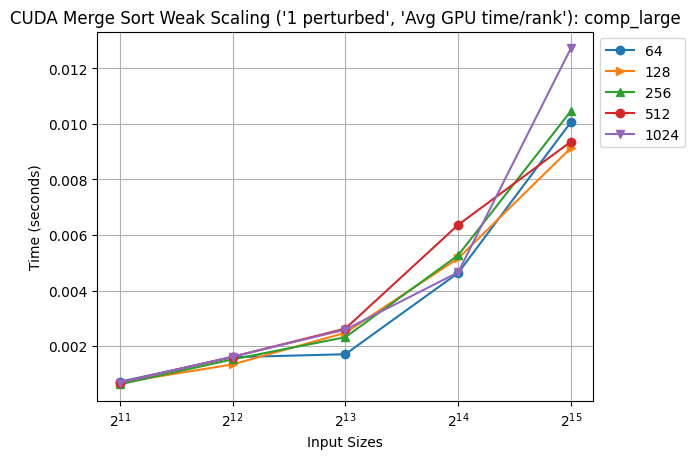

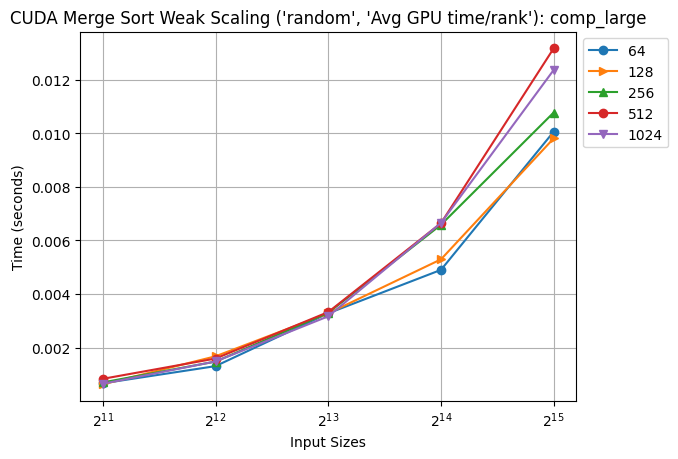

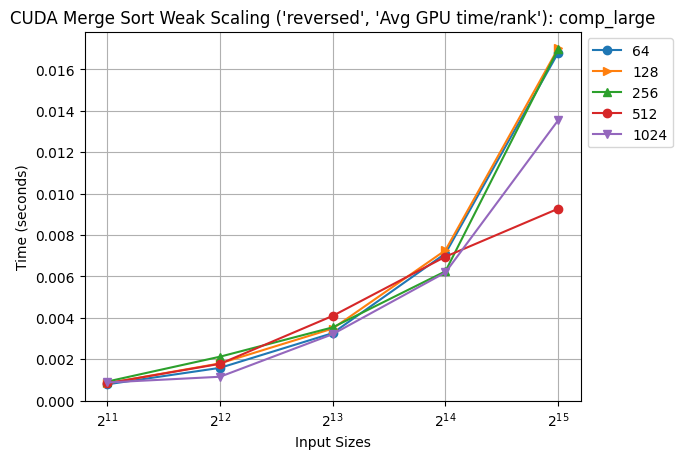

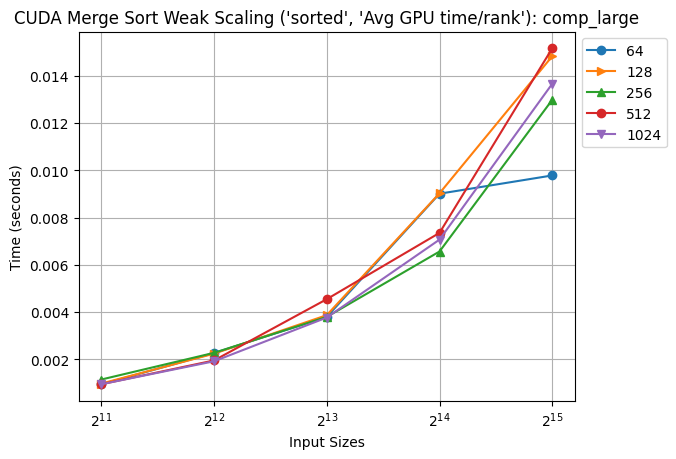

In [76]:
i = 0
for ctk in allctk:
    plot_mpl_numprocs(
        df=ctk.dataframe[[threads[0]]].loc["comp_large"],
        df1= ctk.dataframe[[threads[1]]].loc["comp_large"],
        df2= ctk.dataframe[[threads[2]]].loc["comp_large"],
        df3= ctk.dataframe[[threads[3]]].loc["comp_large"],
        df4= ctk.dataframe[[threads[4]]].loc["comp_large"],
        title=f"CUDA Merge Sort Weak Scaling {sorttypes[i]}: comp_large",
        xlabel="Input Sizes",
        ylabel="Time (seconds)",
        label1='64',
        label2='128',
        label3='256',
        label4= '512',
        label5= '1024',
    )
    i += 1

In [ ]:
# i = 0
# for ctk in allctk:
#     plot_mpl2(
#         df= ctk.dataframe[[temp[1]]].loc["comp_large"],
#         df1= ctk.dataframe[[temp[2]]].loc["comp_large"],
#         title=f"Sorted Weak Scaling {sizes[i]}: Comp Large",
#         xlabel="Threads",
#         ylabel="Time (seconds)",
#         label1='Sample',
#         label2='Merge'
#     )
#     i += 1

## Comm Graphs (for 3 then 2)

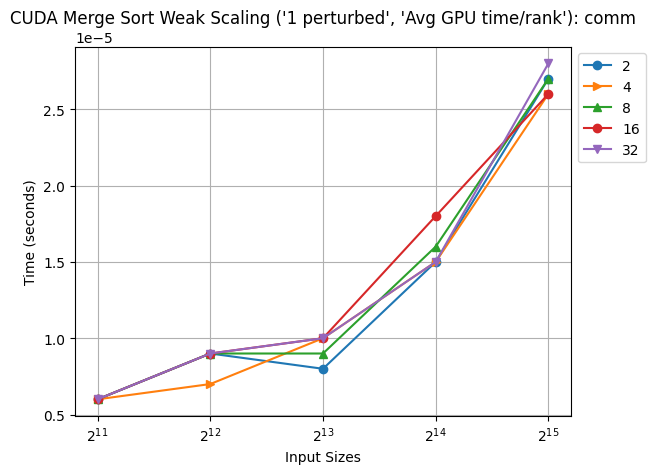

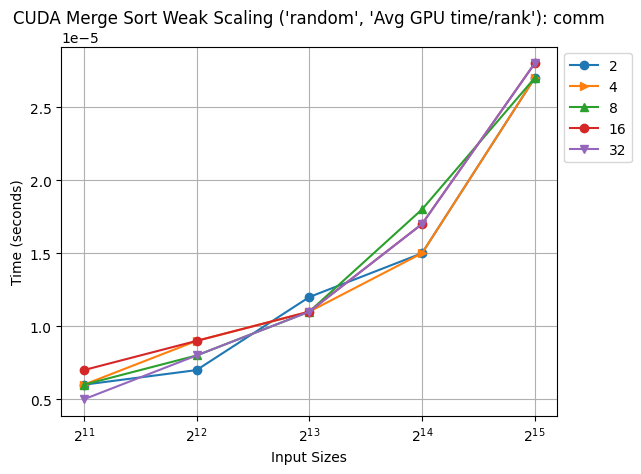

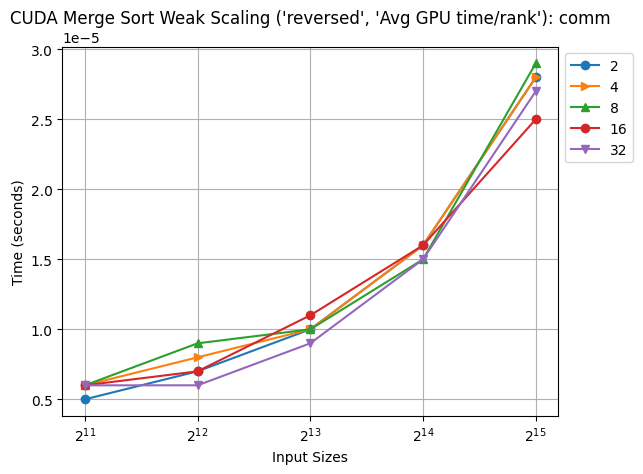

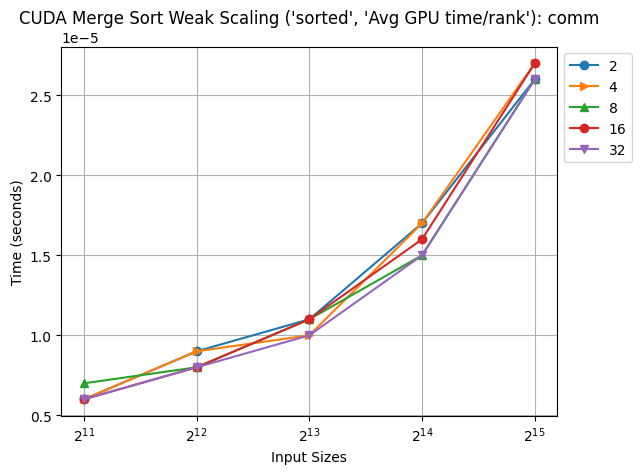

In [77]:
i = 0
for ctk in allctk:
    plot_mpl_numprocs(
        df=ctk.dataframe[[threads[0]]].loc["comm"],
        df1= ctk.dataframe[[threads[1]]].loc["comm"],
        df2= ctk.dataframe[[threads[2]]].loc["comm"],
        df3= ctk.dataframe[[threads[3]]].loc["comm"],
        df4= ctk.dataframe[[threads[4]]].loc["comm"],
        title=f"CUDA Merge Sort Weak Scaling {sorttypes[i]}: comm",
        xlabel="Input Sizes",
        ylabel="Time (seconds)",
        label1='2',
        label2='4',
        label3='8',
        label4= '16',
        label5= '32',
    )
    i += 1